# Calculs numériques sur une fonction

On va montrer ici que la dérivation d'une fonction numérique engendre des approximations.

La fonction choisie comme exemple est la suivante :
$$f(x) = \exp(x)\sin(2\pi x)$$
Sur le domaine \[10,20\]. Cette fonction a le « mauvais goût » d'avoir de fortes variations à cause de la fonction exponentielle avec des oscillations très rapides à cause de la fontion sinus. 

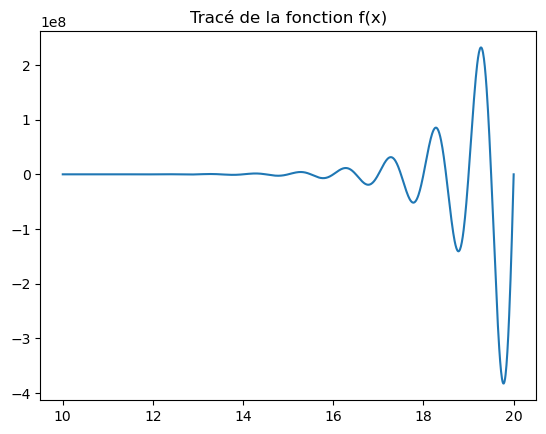

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
xmin = 10
xmax = 20
nb_points = 1001

def f(x):
    return np.exp(x)*np.sin(2*np.pi * x) 



xs,dx = np.linspace(xmin,xmax,nb_points,retstep = True)

fvalues = f(xs)
plt.title('Tracé de la fonction f(x)')
plt.plot(xs,fvalues)
plt.show()

Pour le calcul de la dérivée, numpy utilise par défaut une formule de différenciation centrée du second ordre pour les points centraux et par défaut une formule du premier ordre pour les bords (remarquer que l'erreur aux bords de l'intervalle sera plus grande qu'ailleurs).

$$f'(x_i)=\dfrac{f(x_{i+1})-f(x_{i-1})}{2h}$$

où $h=x_{i}-x_{i-1}$ est l'espacement entre deux points successifs.

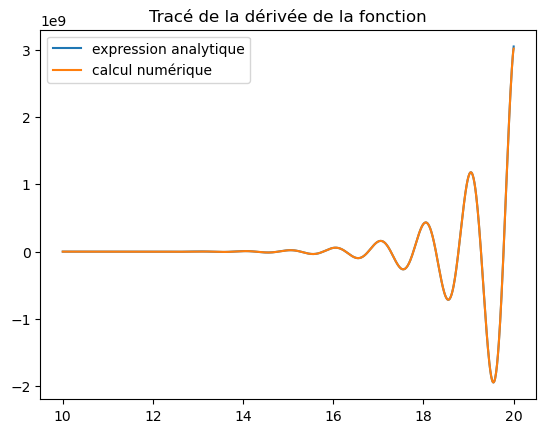

In [2]:
#Expression analytique et numérique de la dérivée de la fonction f
def derf_analytical(x):
    return f(x)+np.exp(x)*2*np.pi*np.cos(2*np.pi * x) 

def derf_numerical(fvalues,dx):
    return np.gradient(fvalues,dx)

def derf_numerical2(fvalues,dx):
    return np.gradient(fvalues,dx,edge_order=2)


#expression numérique et analytique
plt.plot(xs,derf_analytical(xs),label='expression analytique')
plt.plot(xs,derf_numerical(fvalues,dx),label='calcul numérique')
plt.title('Tracé de la dérivée de la fonction')
plt.legend()
plt.show()

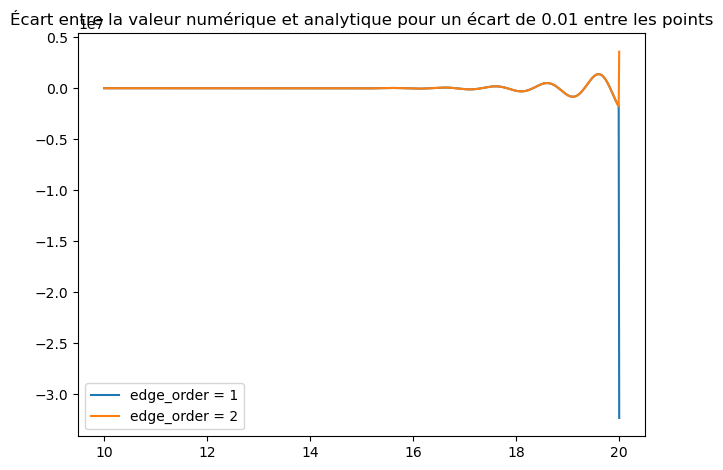

In [3]:
#écart entre l'expression numérique et analytique
plt.plot(xs,derf_numerical(fvalues,dx)-derf_analytical(xs),label='edge_order = 1')
plt.plot(xs,derf_numerical2(fvalues,dx)-derf_analytical(xs),label='edge_order = 2')
plt.title('Écart entre la valeur numérique et analytique pour un écart de {} entre les points'.format(dx))
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

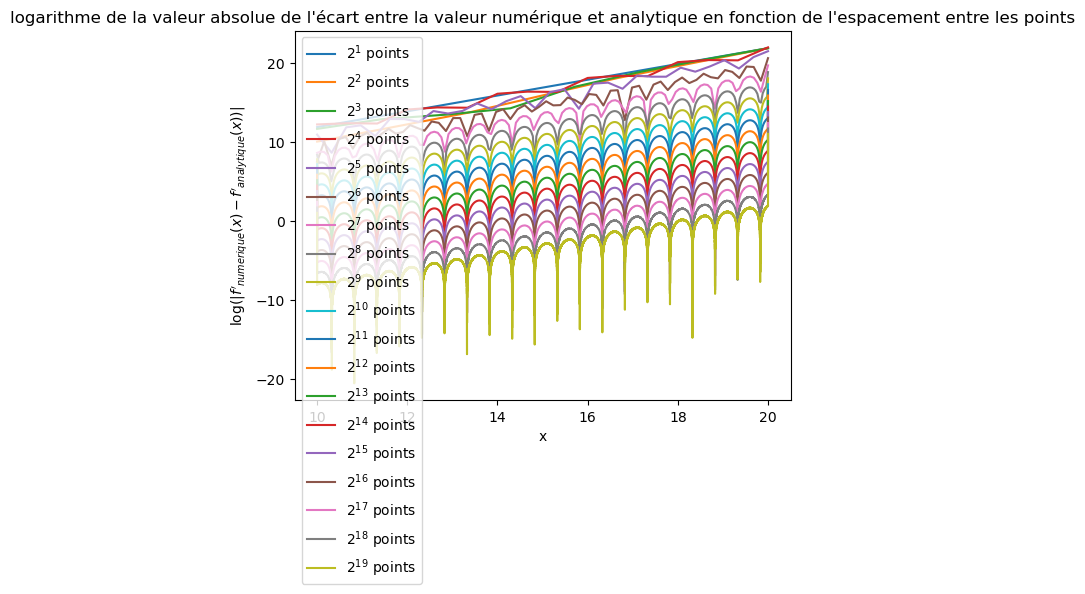

In [4]:
for power in range(1,20):
    xs,dx = np.linspace(xmin,xmax,2**power,retstep = True)
    fvalues = f(xs)
    plt.plot(xs,np.log(np.abs(derf_numerical(fvalues,dx)-derf_analytical(xs))),label = '$2^{{ {} }}$ points'.format(power))
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("$\log(|f'_{numerique}(x)-f'_{analytique}(x))|$")
plt.title("logarithme de la valeur absolue de l'écart entre la valeur numérique et analytique en fonction de l'espacement entre les points")
plt.show()

On peut voir :
* qu'augmenter le nombre de points permet réduire l'écart entre expression analytique et numérique. En effet, dans ce cas, le fait d'approximer la dérivée par une formule de différentiation finie est « correct ». 
* Mais on peut également commencer à voir qu'en arithmétique flottante ($10^8$ points,voire ci-dessous), les erreurs numériques liées à l'utilisation de nombres flottants ne vont plus permettre d'améliorer le calcul, voire dégrader le résultat (par rapport à $10^7$ points).

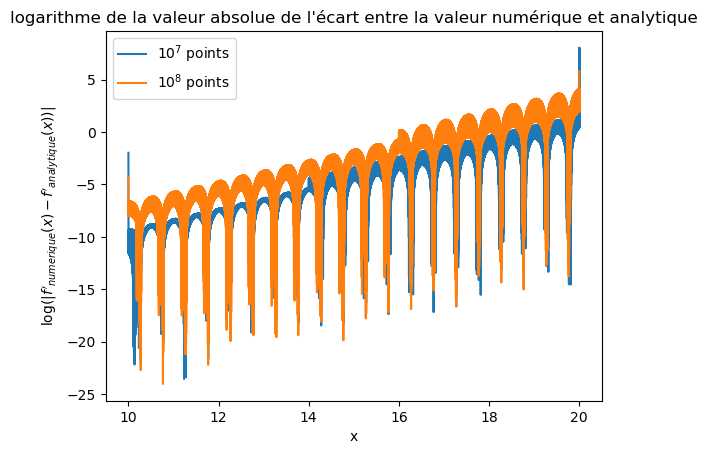

In [5]:
for power in range(7,9):
    xs,dx = np.linspace(xmin,xmax,10**power,retstep = True)
    fvalues = f(xs)
    plt.plot(xs,np.log(np.abs(derf_numerical(fvalues,dx)-derf_analytical(xs))),label = '$10^{}$ points'.format(power))
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("$\log(|f'_{numerique}(x)-f'_{analytique}(x))|$")
plt.title("logarithme de la valeur absolue de l'écart entre la valeur numérique et analytique")
plt.show()

On peut alors regarder la qualité de la dérivation numérique en $x=20$ pour la formule de dérivation centrée au second ordre.

$$f'(x)=\dfrac{f(x+h)-f(x-h)}{2h}$$
 où $h$ est l'écart entre deux points avec $h \to 0$ en prenant $h = \dfrac{1}{2^n} $ 


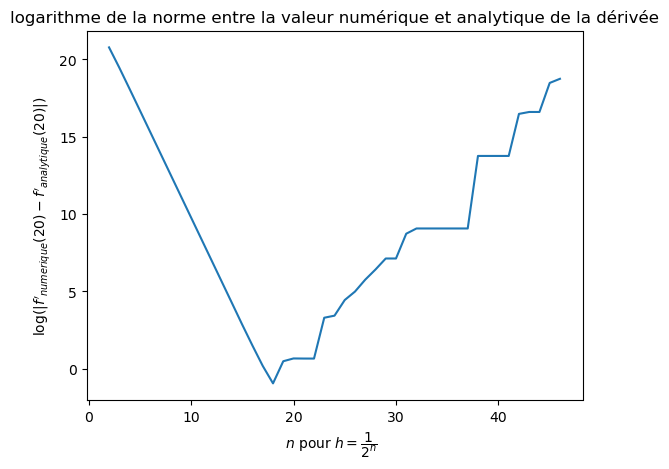

In [6]:
log_norm = []
pows = range(2,47)

for power in pows:
    xs,dx = np.linspace(xmax-1/2**power,xmax+1/2**power,3,retstep = True)
    fvalues = f(xs)
    log_norm.append(np.log(np.abs(derf_numerical(fvalues,dx)[1]-derf_analytical(xs)[1]))) 
plt.plot(pows,log_norm)
plt.title("logarithme de la norme entre la valeur numérique et analytique de la dérivée")
plt.xlabel("$n$ pour $h = \dfrac{1}{2^n} $  ")
plt.ylabel("$\log(\|f'_{numerique}(20)-f'_{analytique}(20)\|)$")
plt.show()

Le graph ci-dessus montre qu'en réduisant l'espacement entre les points, il est possible d'augmenter significativement la précision sur le calcul de la dérivée en faisant tendre $h$ vers zéro, mais à partir d'un certain seuil ($n\approx18$) alors on a une **dégradation** des résultats à cause de la précision sur des calculs en nombre flottant qui est une erreur purement numérique.

Pour la fonction 
$$f_2(x) = \sin(x)$$

On a des soucis analogues même si la convergence vers la valeur analytique est meilleur et plus rapide que pour la fonction précédente.

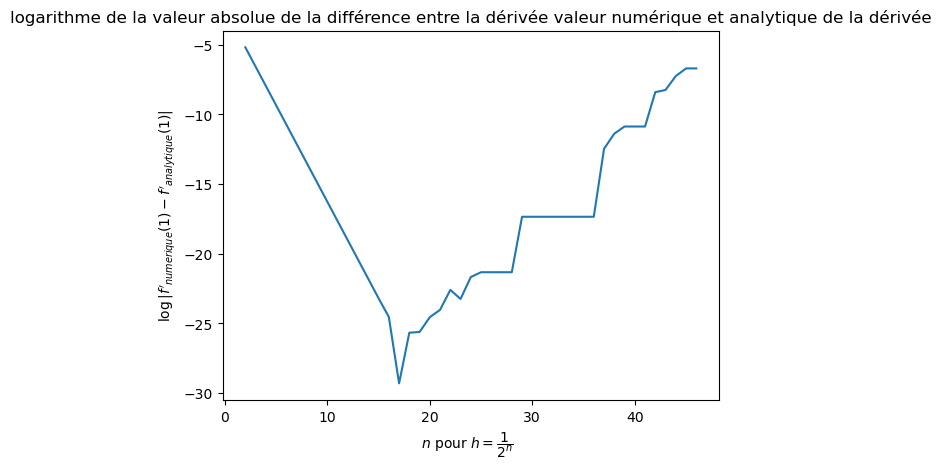

In [22]:
def f2(x):
    return np.sin(x)
#Expression analytique et numérique de la dérivée de la fonction f_2
def derf_analytical2(x):
    return np.cos(x)



log_norm = []
pows = range(2,47)
x = 1
for power in pows:
    xs,dx = np.linspace(x-1/2**power,x+1/2**power,3,retstep = True)
    fvalues = f2(xs)
    if derf_numerical(fvalues,dx)[1]-derf_analytical2(xs)[1] == 0:
        log_norm.append(np.nan)
    else:
        log_norm.append(np.log(np.abs(derf_numerical(fvalues,dx)[1]-derf_analytical2(xs)[1]))) 
plt.plot(pows,log_norm)
plt.title("logarithme de la valeur absolue de la différence entre la dérivée valeur numérique et analytique de la dérivée")
plt.xlabel("$n$ pour $h = \dfrac{1}{2^n} $  ")
plt.ylabel("$\log\|f'_{numerique}(1)-f'_{analytique}(1)\|$")
plt.savefig('deriv.svg')
plt.show()

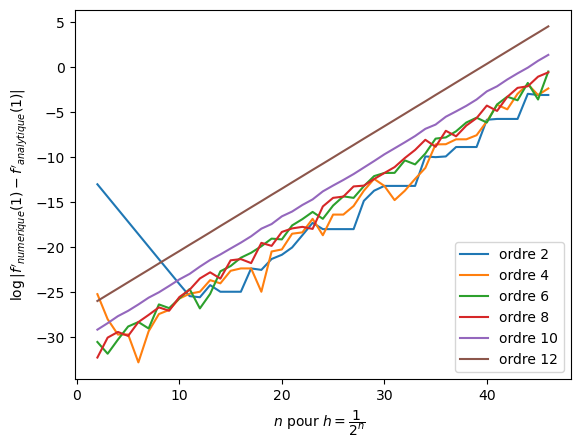

In [32]:
import numpy as np
import findiff


for i in range(2,13,2):

    log_norm = []
    pows = range(2,47)
    x = 1
    for power in pows:
        xs,dx = np.linspace(x-1/2**power,x+1/2**power,101,retstep = True)
        fvalues = np.sin(xs)
        d_dx = findiff.FinDiff(0, dx, 1,acc = i)
        df_dx = d_dx(fvalues) 
        if df_dx[50]-derf_analytical2(xs)[50] == 0:
            log_norm.append(np.nan)
        else:
            log_norm.append(np.log(np.abs(df_dx[50]-derf_analytical2(xs)[50])))
            
    plt.plot(pows,log_norm,label="ordre {}".format(i)) 
    
plt.xlabel("$n$ pour $h = \dfrac{1}{2^n} $  ")
plt.legend(loc="lower right")
plt.ylabel("$\log\|f'_{numerique}(1)-f'_{analytique}(1)\|$")
plt.savefig('deriv.svg')
plt.show()



Il est également possible de calculer les dérivées n-ièmes. Ici, jusqu'à la dérivée 6-ième, en prenant une formule d'ordre 6 l'écart est minime entre la valeur calculée numériquement avec findiff et celle calculée analytiquement.

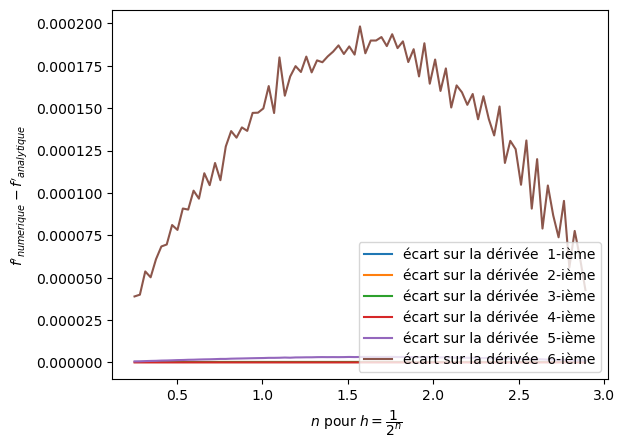

In [74]:
import numpy as np
import findiff

def dernanalytical(xs,i):
    if i%2 == 0:
        return (-1)**(i//2)*np.sin(xs)
    else: 
        return (-1)**(i//2)*np.cos(xs)


    
xs,dx = np.linspace(0,np.pi,101,retstep = True)
fvalues = np.sin(xs)    
    
for i in range(1,7):
    d_dx = findiff.FinDiff(0, dx, i,acc=6)
    df_dx = d_dx(fvalues) 
            
    plt.plot(xs[8:-8],df_dx[8:-8]-dernanalytical(xs,i)[8:-8],label="écart sur la dérivée  {}-ième".format(i)) 
    
plt.xlabel("$n$ pour $h = \dfrac{1}{2^n} $  ")
plt.legend(loc="lower right")
plt.ylabel("$f'_{numerique}-f'_{analytique}$")
plt.savefig('deriv.svg')
plt.show()


L'erreur est par contre plus important lors de l'application répétée de la fonction gradient à l'ordre 2.

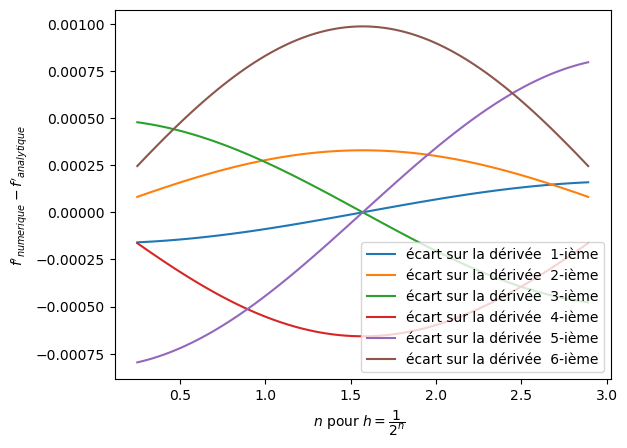

In [69]:
import numpy as np
def derngradientrepeated(fvalues, dx,i):
    if i>1:
        return np.gradient(derngradientrepeated(fvalues, dx,i-1),dx,edge_order = 2)
    elif i==1:
        return np.gradient(fvalues,dx,edge_order = 2)


    
xs,dx = np.linspace(0,np.pi,101,retstep = True)
fvalues = np.sin(xs)    
    
for i in range(1,7):

    df_dx = derngradientrepeated(fvalues, dx,i)
            
    plt.plot(xs[8:-8],df_dx[8:-8]-dernanalytical(xs,i)[8:-8],label="écart sur la dérivée  {}-ième".format(i)) 
    
plt.xlabel("$n$ pour $h = \dfrac{1}{2^n} $  ")
plt.legend(loc="lower right")
plt.ylabel("$f'_{numerique}-f'_{analytique}$")
plt.savefig('deriv.svg')
plt.show()

